In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('bank.csv', sep=';')


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
# Encoding "y" variable
target = {"y":     {"yes": 1, "no": 0}}
df1 = df.replace(target)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [3]:
df1['loan'].replace(to_replace='no', value=1, inplace=True)
df1['loan'].replace(to_replace='yes',  value=0, inplace=True)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,1,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,0,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,1,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,0,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,1,unknown,5,may,226,1,-1,0,unknown,0


In [4]:
df1['default'].replace(to_replace='no', value=1, inplace=True)
df1['default'].replace(to_replace='yes',  value=0, inplace=True)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,no,1,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,1,4789,yes,0,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1,1350,yes,1,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1,1476,yes,0,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,1,0,yes,1,unknown,5,may,226,1,-1,0,unknown,0


In [5]:
df1['housing'].replace(to_replace='no', value=1, inplace=True)
df1['housing'].replace(to_replace='yes',  value=0, inplace=True)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,unknown,0


In [6]:
one_hot = pd.get_dummies(df1['marital'])
df1 = df1.drop('marital',axis = 1)
df1 = df1.join(one_hot)
df1.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,divorced,married,single
0,30,unemployed,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,unknown,0,0,1,0
1,33,services,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,failure,0,0,1,0
2,35,management,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,failure,0,0,0,1
3,30,management,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,unknown,0,0,1,0
4,59,blue-collar,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,unknown,0,0,1,0


In [7]:
one_hot = pd.get_dummies(df1['education'])
df1 = df1.drop('education',axis = 1)
df1 = df1.join(one_hot)
df1 = df1.drop('unknown',axis = 1)
df1.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,y,divorced,married,single,primary,secondary,tertiary
0,30,unemployed,1,1787,1,1,cellular,19,oct,79,...,-1,0,unknown,0,0,1,0,1,0,0
1,33,services,1,4789,0,0,cellular,11,may,220,...,339,4,failure,0,0,1,0,0,1,0
2,35,management,1,1350,0,1,cellular,16,apr,185,...,330,1,failure,0,0,0,1,0,0,1
3,30,management,1,1476,0,0,unknown,3,jun,199,...,-1,0,unknown,0,0,1,0,0,0,1
4,59,blue-collar,1,0,0,1,unknown,5,may,226,...,-1,0,unknown,0,0,1,0,0,1,0


In [8]:
one_hot = pd.get_dummies(df1['job'])
df1 = df1.drop('job',axis = 1)
df1 = df1.join(one_hot)
df1 = df1.drop('unknown',axis = 1)
df1.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,30,1,1787,1,1,cellular,19,oct,79,1,...,0,0,0,0,0,0,0,0,0,1
1,33,1,4789,0,0,cellular,11,may,220,1,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,0,1,cellular,16,apr,185,1,...,0,0,0,1,0,0,0,0,0,0
3,30,1,1476,0,0,unknown,3,jun,199,4,...,0,0,0,1,0,0,0,0,0,0
4,59,1,0,0,1,unknown,5,may,226,1,...,1,0,0,0,0,0,0,0,0,0


In [9]:
one_hot = pd.get_dummies(df1['contact'])
df1 = df1.drop('contact',axis = 1)
df1 = df1.join(one_hot)
df1 = df1.drop('unknown',axis = 1)
df1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,30,1,1787,1,1,19,oct,79,1,-1,...,0,0,0,0,0,0,0,1,1,0
1,33,1,4789,0,0,11,may,220,1,339,...,0,0,0,0,1,0,0,0,1,0
2,35,1,1350,0,1,16,apr,185,1,330,...,0,1,0,0,0,0,0,0,1,0
3,30,1,1476,0,0,3,jun,199,4,-1,...,0,1,0,0,0,0,0,0,0,0
4,59,1,0,0,1,5,may,226,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
one_hot = pd.get_dummies(df1['month'])
df1 = df1.drop('month',axis = 1)
df1 = df1.join(one_hot)
df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
one_hot = pd.get_dummies(df1['poutcome'])
df1 = df1.drop('poutcome',axis = 1)
df1 = df1.join(one_hot)
df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


## Part 1: Build a classifier based on KNN (K=4 for testing) using Euclidean distance.   

In [14]:
# Splitting data for training and testing

X = df1.drop('y', axis=1)
y = df1['y']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
3722,29,1,-76,0,1,27,305,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
433,43,1,130,1,1,5,156,1,337,3,...,0,0,1,0,0,0,1,0,0,0
3284,57,1,367,1,1,16,107,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
840,28,0,-298,0,1,3,559,7,-1,0,...,1,0,0,0,0,0,0,0,0,1
3880,34,1,340,0,1,3,633,28,-1,0,...,1,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:

import time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train,y_train)
start = time.time()
y_pred = knn.predict(X_test)
# Classification Report & Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
end = time.time()
print("Run Time Performance = " + str((end - start)/5) + " seconds")

[[1181   18]
 [ 138   20]]
Accuracy: 0.8850405305821666
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1199
           1       0.53      0.13      0.20       158

    accuracy                           0.89      1357
   macro avg       0.71      0.56      0.57      1357
weighted avg       0.85      0.89      0.85      1357

Run Time Performance = 0.01863827705383301 seconds


Recall is the ability of a classifier to find all positive instances.For the above result, we can say that the recall value is good.
Recall = TP/(TP+FN)
Precision = TP/(TP + FP)
f1-score = 2*(Recall * Precision) / (Recall + Precision)


## Part 2: Build a classifier based on KNN (K=4 for testing) using Manhattan distance. 

In [18]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
# Classification Report & Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
end = time.time()
print("Run Time Performance = " + str((end - start)/5) + " seconds")

[[1186   13]
 [ 146   12]]
Accuracy: 0.8828297715549005
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1199
           1       0.48      0.08      0.13       158

    accuracy                           0.88      1357
   macro avg       0.69      0.53      0.53      1357
weighted avg       0.84      0.88      0.84      1357

Run Time Performance = 0.01883845329284668 seconds


Recall is the ability of a classifier to find all positive instances.For the above result, we can say that the recall value is good.
Recall = TP/(TP+FN)
Precision = TP/(TP + FP)
f1-score = 2*(Recall * Precision) / (Recall + Precision)

## Part 3: Build a classifier based on linear SVM

In [19]:
# the SVM Classifier
from sklearn import svm
start = time.time()
# build model
svm_model = svm.SVC(kernel = 'linear',probability=True)#linear SVM
# fit classifiers
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [20]:
# Prediction
svm_pred = svm_model.predict(X_test)

# model Evaluation
print("Accuracy:",accuracy_score(svm_pred, y_test))
# Classification Report & Confusion matrix
print(confusion_matrix(svm_pred, y_test))
print(classification_report(svm_pred, y_test))


Accuracy: 0.8901989683124539
[[1183  133]
 [  16   25]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1316
           1       0.16      0.61      0.25        41

    accuracy                           0.89      1357
   macro avg       0.57      0.75      0.60      1357
weighted avg       0.96      0.89      0.92      1357



Support vector machines gives accuracy of 0.886 which is quite good

Best Threshold: 0.11462167530829254


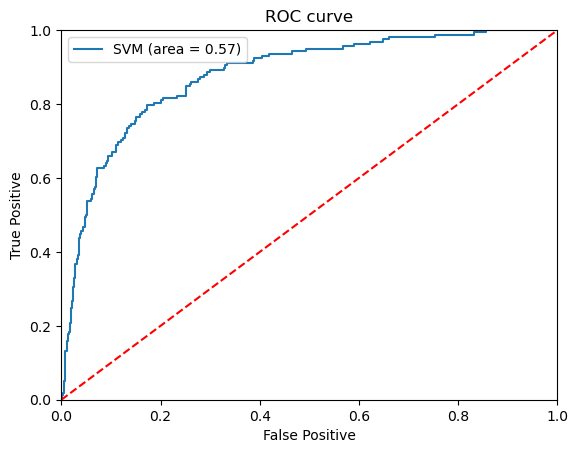

Run Time Performance = 2.5367913246154785 seconds


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, svm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Best Threshold:", optimal_threshold)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.savefig('ROC curve')
plt.show()
end = time.time()
print("Run Time Performance = " + str((end - start)/5) + " seconds")

AUC score for SVM : 0.58

There are false positive points on the x-axis and true positive points on the y-axis of the roc graph. These points are combined to obtain the ROC curve. As the ROC plot approaches the y=x function a failed test occurs. Because a perfect result would be the point (0, 1), which indicates 0% false positives and 100% true positives. We can say good for the performance of the above roc curve.

## Part 4: Build a classifier based on polynomial SVM

In [22]:
# the SVM Classifier
from sklearn import svm
start = time.time()
# build model
svm_model = svm.SVC(kernel = 'poly',probability=True)#polynomial SVM
# fit classifiers
svm_model.fit(X_train, y_train)


SVC(kernel='poly', probability=True)

In [23]:
# Prediction
svm_pred = svm_model.predict(X_test)

# model evaluation
print("Accuracy:",accuracy_score(svm_pred, y_test))
# Classification Report & Confusion matrix
print(confusion_matrix(svm_pred, y_test))
print(classification_report(svm_pred, y_test))


Accuracy: 0.8901989683124539
[[1169  119]
 [  30   39]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1288
           1       0.25      0.57      0.34        69

    accuracy                           0.89      1357
   macro avg       0.61      0.74      0.64      1357
weighted avg       0.94      0.89      0.91      1357



Support vector machines gives accuracy of 0.893 which is quite good

Best Threshold: 0.09143320481678932


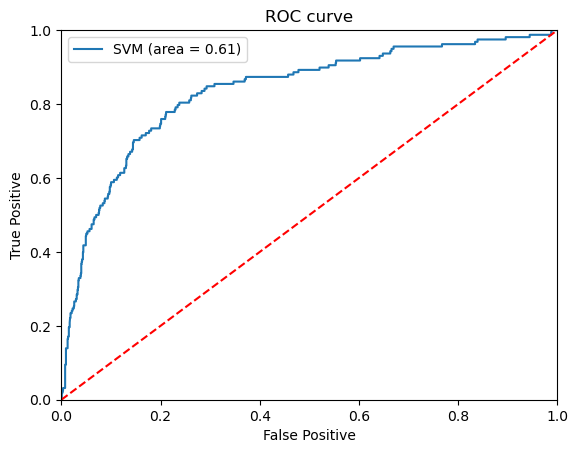

Run Time Performance = 0.6582322120666504 seconds


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, svm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Best Threshold:", optimal_threshold)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.savefig('ROC curve')
plt.show()
end = time.time()
print("Run Time Performance = " + str((end - start)/5) + " seconds")

AUC score for SVM : 0.63

There are false positive points on the x-axis and true positive points on the y-axis of the roc graph. These points are combined to obtain the ROC curve. As the ROC plot approaches the y=x function a failed test occurs. Because a perfect result would be the point (0, 1), which indicates 0% false positives and 100% true positives. We can say good for the performance of the above roc curve.

### Comments

KNN (K=4 for testing) using Euclidean distance -> Accuracy: 0.885 
KNN (K=4 for testing) using Manhattan distance -> Accuracy: 0.883
linear SVM -> Accuracy: 0.886
polynomial SVM -> Accuracy: 0.893

Polynomial SVM Classifier at accuracy = 0.893 achieved the highest performance scores in predicting target. 

Linear svm has the longest runtime.(0.34739151000976565 seconds)

KNN (K=4 for testing) using Euclidean distance has the shortest runtime.(0.01760106086730957 seconds)